<h1> Customer Churn Prediction </h1>

<hr style="height:1px;"> 

<strong> Predict whether a customer will churn or not for a telecom company dataset. </strong>

<strong> We will make use of Logistic Regression, Support Vector Machine, Decision Tree Classifier, Random Forest Classifier and Xtreme Gradient Boosted Trees to perform the prediction and select which algorithm predicts well based on a number of metrics. </strong>

<hr style="height:1px;"> 

### About the dataset

1. The dataset contains details of 7043 customers across 21 features
2. The dataset contains a lot categorical features and very few numerical features
3. The dataset captures features such as hasDependent, tenure, isSeniorCitizen, hasPhoneService, typeOfInternetService, deviceProtection, contractType, monthlyCharges and isChurn

<hr style="height:1px;"> 

In [1]:
filePath = 'https://raw.githubusercontent.com/NikhilKorati/Customer-Churn/master/WA_Telco-Customer-Churn.csv'

### Import Necessary libraries required for exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
raw_churn_df = pd.read_csv(filePath)

In [4]:
raw_churn_df.shape

(7043, 21)

In [5]:
raw_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
raw_churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
raw_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
raw_churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
raw_churn_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,8277-RVRSV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Check for missing values

In [10]:
raw_churn_df.TotalCharges = pd.to_numeric(raw_churn_df.TotalCharges, errors='coerce')

In [11]:
raw_churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
raw_churn_df = raw_churn_df[np.isfinite(raw_churn_df.TotalCharges)]

In [13]:
raw_churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Wrangling

In [14]:
def getValueCounts(columns, df):
    for col in columns:
        print(col+':')
        print(df[col].value_counts())
        print('-----------------------------------------------------')

In [15]:
getValueCounts(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
                'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Contract']\
               ,raw_churn_df)

OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
-----------------------------------------------------
OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
-----------------------------------------------------
DeviceProtection:
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
-----------------------------------------------------
TechSupport:
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
-----------------------------------------------------
StreamingTV:
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
-----------------------------------------------------
StreamingMovies:
No                     2781
Yes                   

#### Replace No internet service to No

In [16]:
def replaceNoInternetService(columns, df):
    for col in columns:
        df[col].replace('No internet service', 'No', inplace=True)

In [17]:
replaceNoInternetService(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
                'StreamingTV', 'StreamingMovies']\
                 ,raw_churn_df)

In [18]:
getValueCounts(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
                'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Contract']\
               ,raw_churn_df)

OnlineSecurity:
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
-----------------------------------------------------
OnlineBackup:
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
-----------------------------------------------------
DeviceProtection:
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
-----------------------------------------------------
TechSupport:
No     4992
Yes    2040
Name: TechSupport, dtype: int64
-----------------------------------------------------
StreamingTV:
No     4329
Yes    2703
Name: StreamingTV, dtype: int64
-----------------------------------------------------
StreamingMovies:
No     4301
Yes    2731
Name: StreamingMovies, dtype: int64
-----------------------------------------------------
MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
-----------------------------------------------------
Contract:
Month-to-month    3875
Two year          1685
On

#### Replace No Phone Service to No

In [19]:
raw_churn_df.MultipleLines.replace('No phone service', 'No', inplace=True)

In [20]:
raw_churn_df.MultipleLines.value_counts()

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

In [21]:
raw_churn_df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [22]:
raw_churn_df.SeniorCitizen.replace([0, 1], ['No', 'Yes'], inplace=True)

In [23]:
raw_churn_df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

## Exploratory Analysis

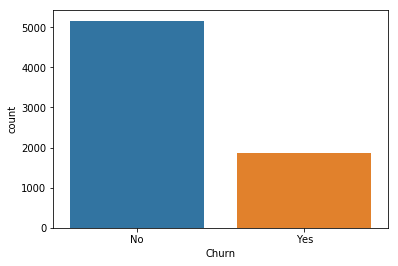

In [24]:
sns.countplot(raw_churn_df.Churn)
plt.show()

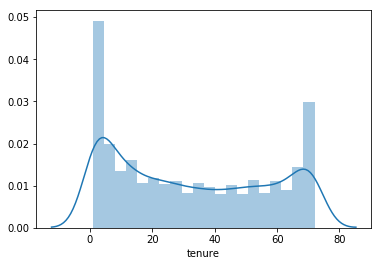

In [25]:
sns.distplot(raw_churn_df.tenure, bins=20)
plt.show()

In [26]:
bins = [0, 9, 29, 55, 72]
groups = ['0 to 9', '9 to 29', '29 to 55', '55 to 72']
raw_churn_df['binned_tenure'] = pd.cut(raw_churn_df.tenure, bins, labels=groups)

In [27]:
raw_churn_df.binned_tenure.value_counts()

0 to 9      1843
55 to 72    1755
29 to 55    1719
9 to 29     1715
Name: binned_tenure, dtype: int64

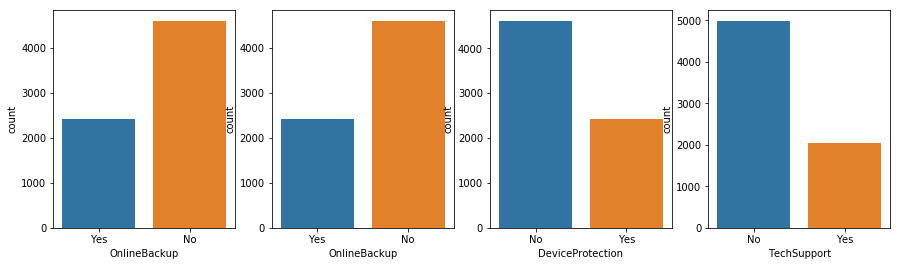

In [28]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
sns.countplot(raw_churn_df.OnlineBackup, ax = axes[0])
sns.countplot(raw_churn_df.OnlineBackup, ax = axes[1])
sns.countplot(raw_churn_df.DeviceProtection, ax = axes[2])
sns.countplot(raw_churn_df.TechSupport, ax = axes[3])
plt.show()

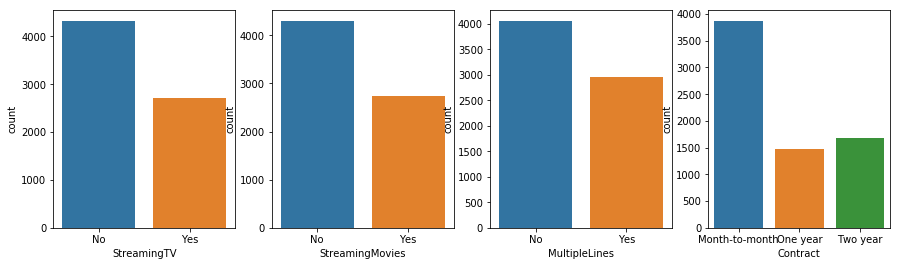

In [29]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
sns.countplot(raw_churn_df.StreamingTV, ax = axes[0])
sns.countplot(raw_churn_df.StreamingMovies, ax = axes[1])
sns.countplot(raw_churn_df.MultipleLines, ax = axes[2])
sns.countplot(raw_churn_df.Contract, ax = axes[3])
plt.show()

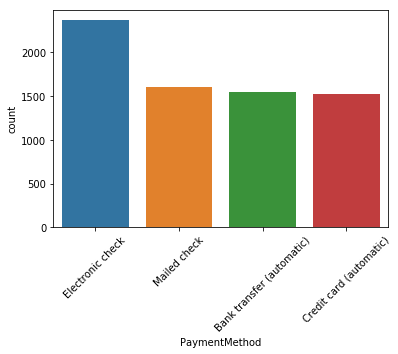

In [30]:
sns.countplot(raw_churn_df.PaymentMethod)
plt.xticks(rotation = 45)
plt.show()

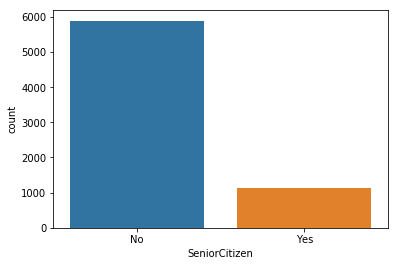

In [31]:
sns.countplot(raw_churn_df.SeniorCitizen)
plt.show()

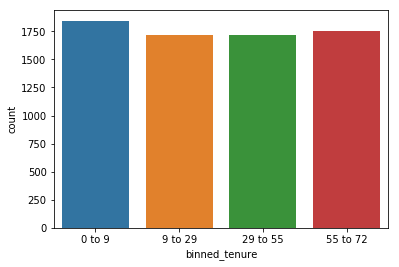

In [32]:
sns.countplot(raw_churn_df.binned_tenure)
plt.show()

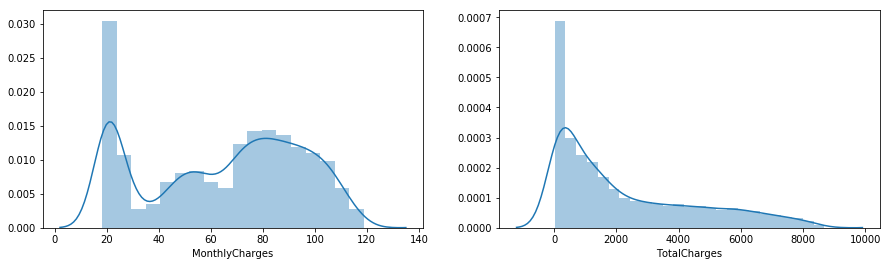

In [33]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 2, figsize = fig_size)
sns.distplot(raw_churn_df.MonthlyCharges, ax = axes[0])
sns.distplot(raw_churn_df.TotalCharges, ax = axes[1])
plt.show()

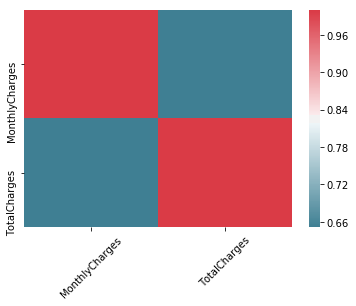

In [34]:
sns.heatmap(raw_churn_df[['MonthlyCharges', 'TotalCharges']].corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.xticks(rotation= 45)
plt.show()

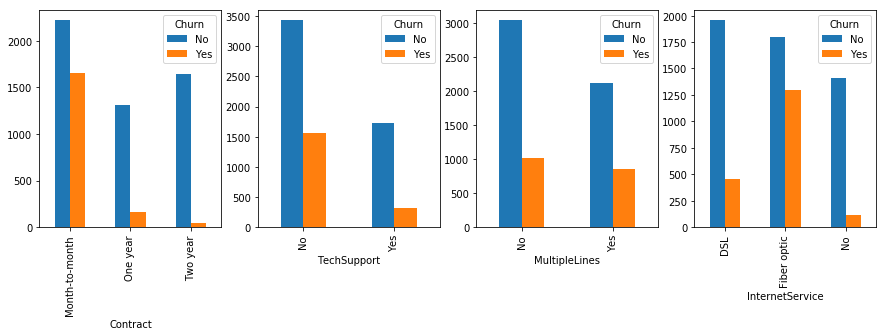

In [35]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
pd.crosstab(raw_churn_df.Contract, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[0])
pd.crosstab(raw_churn_df.TechSupport, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[1])
pd.crosstab(raw_churn_df.MultipleLines, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[2])
pd.crosstab(raw_churn_df.InternetService, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[3])
plt.show()

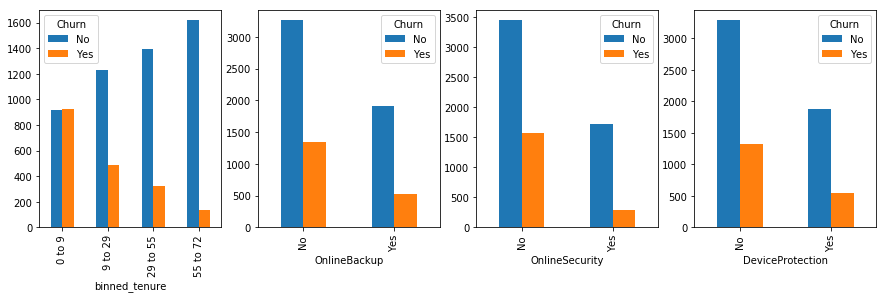

In [36]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
pd.crosstab(raw_churn_df.binned_tenure, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[0])
pd.crosstab(raw_churn_df.OnlineBackup, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[1])
pd.crosstab(raw_churn_df.OnlineSecurity, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[2])
pd.crosstab(raw_churn_df.DeviceProtection, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[3])
plt.show()

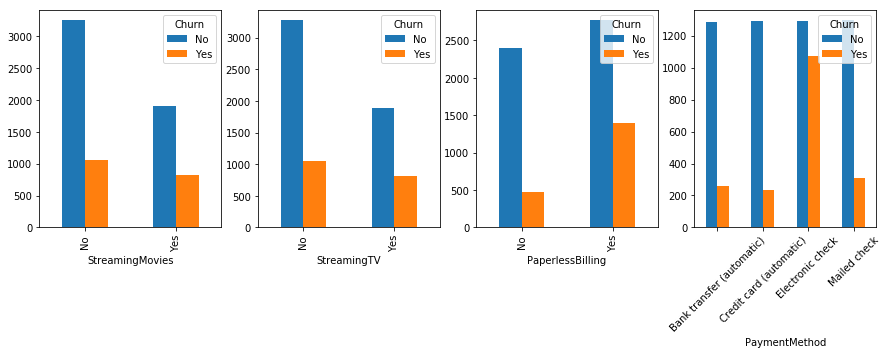

In [37]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
pd.crosstab(raw_churn_df.StreamingMovies, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[0])
pd.crosstab(raw_churn_df.StreamingTV, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[1])
pd.crosstab(raw_churn_df.PaperlessBilling, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[2])
pd.crosstab(raw_churn_df.PaymentMethod, raw_churn_df.Churn).plot(kind= 'bar', ax = axes[3])
plt.xticks(rotation = 45)
plt.show()

## Data Preparation

In [38]:
data_prep_df = raw_churn_df.drop(['customerID', 'tenure'], axis = 1)

In [39]:
data_prep_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'binned_tenure'],
      dtype='object')

In [40]:
dummy_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',\
                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',\
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\
                 'Contract', 'PaperlessBilling', 'PaymentMethod','binned_tenure']

data_new = data_prep_df

for cat in dummy_columns:
    dummy_cols = pd.get_dummies(data_prep_df[cat], prefix=cat, drop_first=True)
    data_new = data_new.join(dummy_cols)


In [41]:
data_vars = data_new.columns.values.tolist()
to_keep = [i for i in data_vars if i not in dummy_columns]
to_keep

['MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender_Male',
 'SeniorCitizen_Yes',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'binned_tenure_9 to 29',
 'binned_tenure_29 to 55',
 'binned_tenure_55 to 72']

In [42]:
final_churn_data = data_new[to_keep]
final_churn_data = final_churn_data.drop('MonthlyCharges', axis = 1)
final_churn_data

,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,binned_tenure_9 to 29,binned_tenure_29 to 55,binned_tenure_55 to 72
0,29.85,No,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1889.50,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,108.15,Yes,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1840.75,No,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,151.65,Yes,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5,820.50,Yes,0,0,0,0,1,1,1,0,...,1,0,0,1,0,1,0,0,0,0
6,1949.40,No,1,0,0,1,1,1,1,0,...,0,0,0,1,1,0,0,1,0,0
7,301.90,No,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,3046.05,Yes,0,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,0
9,3487.95,No,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
final_churn_data.Churn = label_encoder_y.fit_transform(final_churn_data.Churn)
final_churn_data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Model Building

In [44]:
y = ['Churn']
X = [i for i in final_churn_data.columns.values.tolist() if i not in y]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_churn_data[X], final_churn_data[y], test_size=0.3, random_state=0)

#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
logistic_lasso = LogisticRegression(C=0.1, penalty='l1')

logistic_lasso.fit(X_train, y_train)
y_pred = logistic_lasso.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_lasso.score(X_test, y_test)))

/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.80


#### Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.79


#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy')
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, y_test)))

feature_importances = pd.DataFrame(randomForest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

/home/nikhil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of random forest classifier on test set: 0.77


,importance
TotalCharges,0.320164
InternetService_Fiber optic,0.054006
PaymentMethod_Electronic check,0.047297
Contract_Two year,0.046314
gender_Male,0.038359
MultipleLines_Yes,0.032753
OnlineBackup_Yes,0.032317
PaperlessBilling_Yes,0.032269
Partner_Yes,0.032210
StreamingTV_Yes,0.032063


In [50]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

seed = 7

models = []
models.append(('LR', LogisticRegression(penalty='l1')))
models.append(('DecisionTree', DecisionTreeClassifier(criterion = 'entropy', max_depth=4)))
models.append(('SVM', LinearSVC(C=0.00005)))
models.append(('RF', RandomForestClassifier(n_estimators = 20, criterion = 'entropy')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    



LR: 0.802106 (0.013696)
DecisionTree: 0.790730 (0.019507)
SVM: 0.757418 (0.024374)
RF: 0.787479 (0.014909)
